In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

In [3]:
df=pd.read_csv('./datasets/진짜통합.csv',index_col='Date')
df.drop('vkospi',axis=1,inplace=True)

## Granger
    - Granger 인과검정의 영가설은 X가 Y에 영향을 미치지 않는다 이다. 즉 H0를 기각해야한다(p-value < alpha)

In [3]:
from statsmodels.tsa.stattools import grangercausalitytests
#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

#df.replace(',', '', regex=True, inplace=True) df =df.apply(pd.to_numeric, errors='coerce') # numeric 변환
maxlag= 14
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=True):    

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            # if verbose:print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            min_p_value_index = np.argmin(p_values)
            df.loc[r, c] = min_p_value
            print(r,c)
            print(f'Minimum P-value Index: {min_p_value_index} (Lag: {min_p_value_index + 1})')
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
GCM=grangers_causation_matrix(df, variables = df.columns)
GCM

Adj Close Adj Close
Minimum P-value Index: 0 (Lag: 1)
Volume Adj Close
Minimum P-value Index: 1 (Lag: 2)
구리 Adj Close
Minimum P-value Index: 0 (Lag: 1)
천연가스 Adj Close
Minimum P-value Index: 0 (Lag: 1)
원/달러 Adj Close
Minimum P-value Index: 3 (Lag: 4)
은 Adj Close
Minimum P-value Index: 12 (Lag: 13)
10년 채권 Adj Close
Minimum P-value Index: 3 (Lag: 4)
CD91일 Adj Close
Minimum P-value Index: 13 (Lag: 14)
콜 금리 Adj Close
Minimum P-value Index: 12 (Lag: 13)
국고채 3년 Adj Close
Minimum P-value Index: 11 (Lag: 12)
회사채 3년 Adj Close
Minimum P-value Index: 5 (Lag: 6)
WTI유 Adj Close
Minimum P-value Index: 3 (Lag: 4)
SP500지수 Adj Close
Minimum P-value Index: 10 (Lag: 11)
금 Adj Close
Minimum P-value Index: 10 (Lag: 11)
원/엔 Adj Close
Minimum P-value Index: 3 (Lag: 4)
원/위안 Adj Close
Minimum P-value Index: 3 (Lag: 4)
Adj Close Volume
Minimum P-value Index: 0 (Lag: 1)
Volume Volume
Minimum P-value Index: 0 (Lag: 1)
구리 Volume
Minimum P-value Index: 0 (Lag: 1)
천연가스 Volume
Minimum P-value Index: 10 (Lag: 11)
원/달러 

,Adj Close_x,Volume_x,구리_x,천연가스_x,원/달러_x,은_x,10년 채권_x,CD91일_x,콜 금리_x,국고채 3년_x,회사채 3년_x,WTI유_x,SP500지수_x,금_x,원/엔_x,원/위안_x
Adj Close_y,1.0000,0.5330,0.0000,0.3350,0.0000,0.0000,0.0830,0.0000,0.2853,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Volume_y,0.0000,1.0000,0.0001,0.0001,0.0000,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0489,0.0000
구리_y,0.3797,0.2795,1.0000,0.0115,0.0017,0.1445,0.4774,0.1267,0.0718,0.0069,0.0005,0.4259,0.0000,0.0687,0.1278,0.0077
천연가스_y,0.0017,0.6032,0.3659,1.0000,0.0248,0.2768,0.1205,0.4574,0.0197,0.0193,0.0268,0.1026,0.0063,0.0526,0.0660,0.0034
원/달러_y,0.0000,0.3007,0.0000,0.0054,1.0000,0.0012,0.0001,0.0019,0.0000,0.0000,0.0000,0.0043,0.0000,0.0000,0.0000,0.0000
은_y,0.0051,0.1442,0.0876,0.1743,0.0023,1.0000,0.6961,0.4770,0.3252,0.2147,0.3731,0.0513,0.0003,0.0992,0.0038,0.0008
10년 채권_y,0.2314,0.3862,0.0010,0.0001,0.0136,0.2985,1.0000,0.0024,0.0049,0.0000,0.0000,0.0007,0.2223,0.0013,0.0000,0.0577
CD91일_y,0.0002,0.0157,0.0000,0.0000,0.0000,0.0320,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0276,0.0000,0.0000
콜 금리_y,0.0000,0.0254,0.0011,0.0000,0.0000,0.2869,0.0034,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.1159,0.0000,0.0000
국고채 3년_y,0.0000,0.1930,0.0159,0.0000,0.0000,0.6707,0.0081,0.0010,0.0004,1.0000,0.0000,0.0174,0.0062,0.0004,0.0000,0.0000


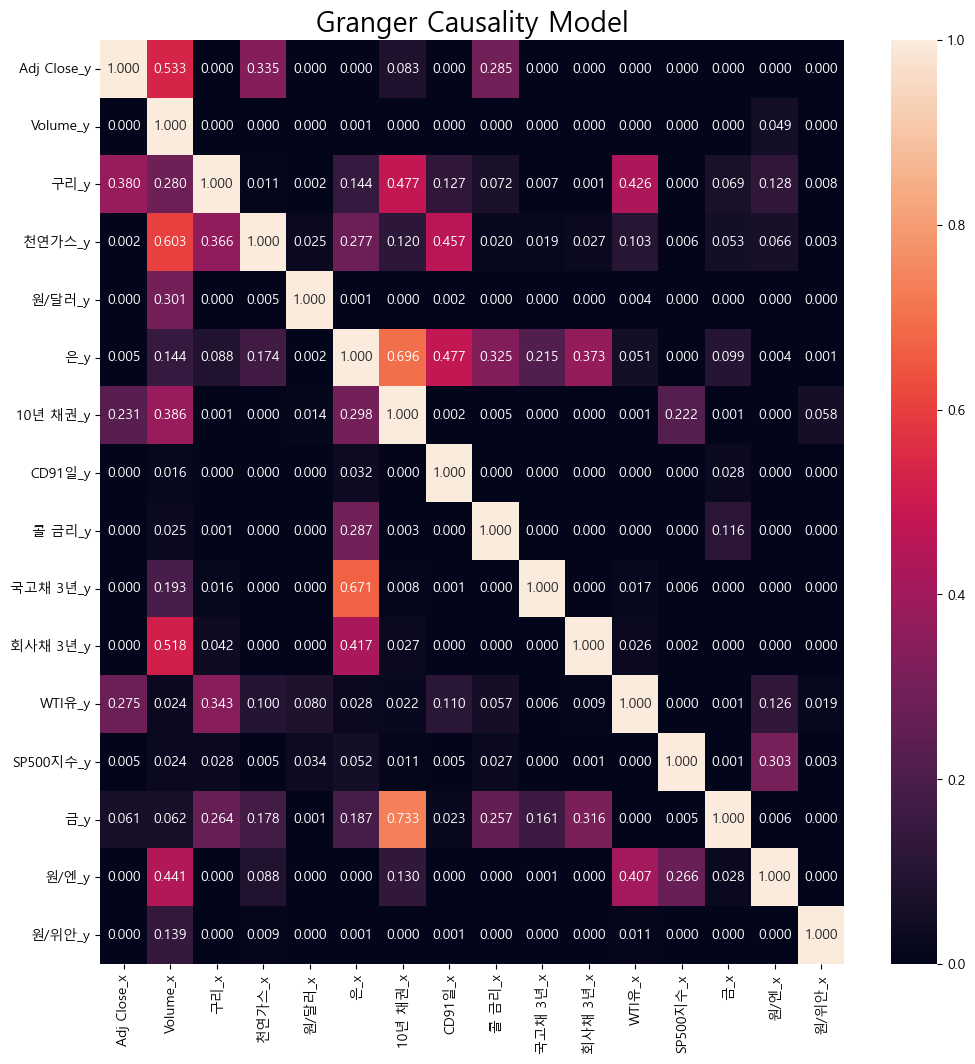

In [4]:
fig,ax= plt.subplots(1,1,figsize=(12,12),sharey=True)

sns.heatmap(GCM, annot=True,fmt='.3f')
plt.title('Granger Causality Model', fontsize=20)
plt.show()

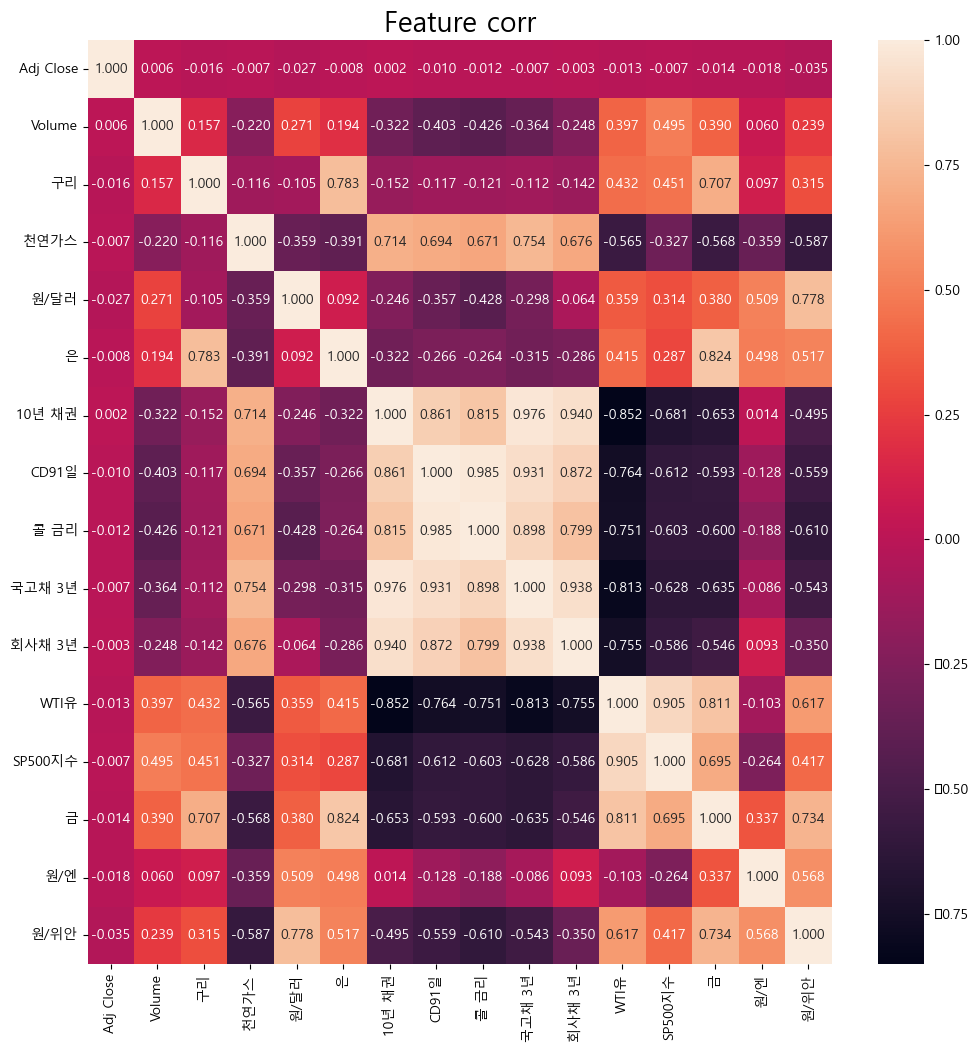

In [9]:
cor=df.corr()
fig,ax= plt.subplots(1,1,figsize=(12,12),sharey=True)

sns.heatmap(cor, annot=True,fmt='.3f')
plt.title('Feature corr', fontsize=20)
plt.show()

## 요한슨 공적분 

In [19]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def calc_sig_dist(cols):
    out = coint_johansen(df[cols], 1, 1)
    stats = [round(x,2) for x in out.lr1]
    # sigs = [round(x,2) for x in out.cvt[:, 0]]
    sigs= out.cvt
    yns = [x>y for x,y in zip(stats,sigs)]
    # dist = np.mean(np.array(stats) - np.array(sigs))
    

    print('stats: ',stats)                                            ## stats는 공적분 통계량
    print('sig-level: ',sigs)                                         ## sig-level은 유의수준 0.05에 해당하는 관측치
    print('significant_yn: ',[x>y for x,y in zip(stats,sigs)])        ## significant_yn은 유의 여부(장기 안정성), dist는 안정성의 강도를 의미한다.
    # print('dist: ', round(dist,2)) 
calc_sig_dist(df.columns)

stats:  [4482.44, 1635.02, 1200.64, 830.81, 593.06, 394.77, 278.61, 220.28, 167.14, 118.07, 86.36, 58.27, 39.44, 20.72, 9.15, 1.02]
sig-level:  [[     nan      nan      nan]
 [     nan      nan      nan]
 [     nan      nan      nan]
 [     nan      nan      nan]
 [350.1125 358.719  375.3203]
 [298.8836 306.8988 322.4264]
 [251.6293 259.0267 273.3838]
 [208.3582 215.1268 228.2226]
 [169.0618 175.1584 187.1891]
 [133.7852 139.278  150.0778]
 [102.4674 107.3429 116.9829]
 [ 75.1027  79.3422  87.7748]
 [ 51.6492  55.2459  62.5202]
 [ 32.0645  35.0116  41.0815]
 [ 16.1619  18.3985  23.1485]
 [  2.7055   3.8415   6.6349]]
significant_yn:  [array([False, False, False]), array([False, False, False]), array([False, False, False]), array([False, False, False]), array([ True,  True,  True]), array([ True,  True,  True]), array([ True,  True,  True]), array([ True,  True, False]), array([False, False, False]), array([False, False, False]), array([False, False, False]), array([False, False, False]

C:\Users\dgh06\AppData\Local\Temp\ipykernel_3024\2607479755.py:4: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  out = coint_johansen(df[cols], 1, 1)


In [28]:
import statsmodels
from statsmodels.tsa.stattools import coint

score, pvalue, _ = coint(df['Adj Close'],df['Volume'])
print('Correlation: ' + str(df['Adj Close'].corr(df['Volume'])))
print('Cointegration test p-value: {:.6f}'.format(pvalue))

## 공적분의 p-value가 매우 적게 나와 유의한 것으로 판정된다.

Correlation: 0.006241566437260101
Cointegration test p-value: 0.000000


## ADF모델을 이용해서 컬럼별 정상성 검정

In [6]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

adf_df = pd.DataFrame()  # 빈 데이터프레임 생성

for i in df.columns:
    adf_sample = adfuller(df[i], autolag='AIC')
    
    adf_result = pd.Series(adf_sample[:4], index=['stat', 'p_value', 'lag', 'observ'])
    sig_level = adf_sample[4]['5%']
    adf_result['5%'] = sig_level
    
    adf_df[i] = adf_result  # 결과를 데이터프레임에 열(column)로 추가

adf_df = adf_df.transpose()  # 행(row)과 열(column)을 전환하여 변환

adf_df

,stat,p_value,lag,observ,5%
Adj Close,-35.815382,0.000000,3.0,4982.0,-2.862120
Volume,-4.009381,0.001362,25.0,4960.0,-2.862123
구리,-2.521985,0.110216,1.0,4984.0,-2.862120
천연가스,-2.785123,0.060430,24.0,4961.0,-2.862123
원/달러,-2.373737,0.149287,32.0,4953.0,-2.862124
은,-2.157568,0.222004,22.0,4963.0,-2.862123
10년 채권,-1.439913,0.562999,10.0,4975.0,-2.862121
CD91일,-1.771975,0.394461,32.0,4953.0,-2.862124
콜 금리,-1.393929,0.585183,32.0,4953.0,-2.862124
국고채 3년,-1.381874,0.590934,22.0,4963.0,-2.862123


## 16개 컬럼들의 subplots

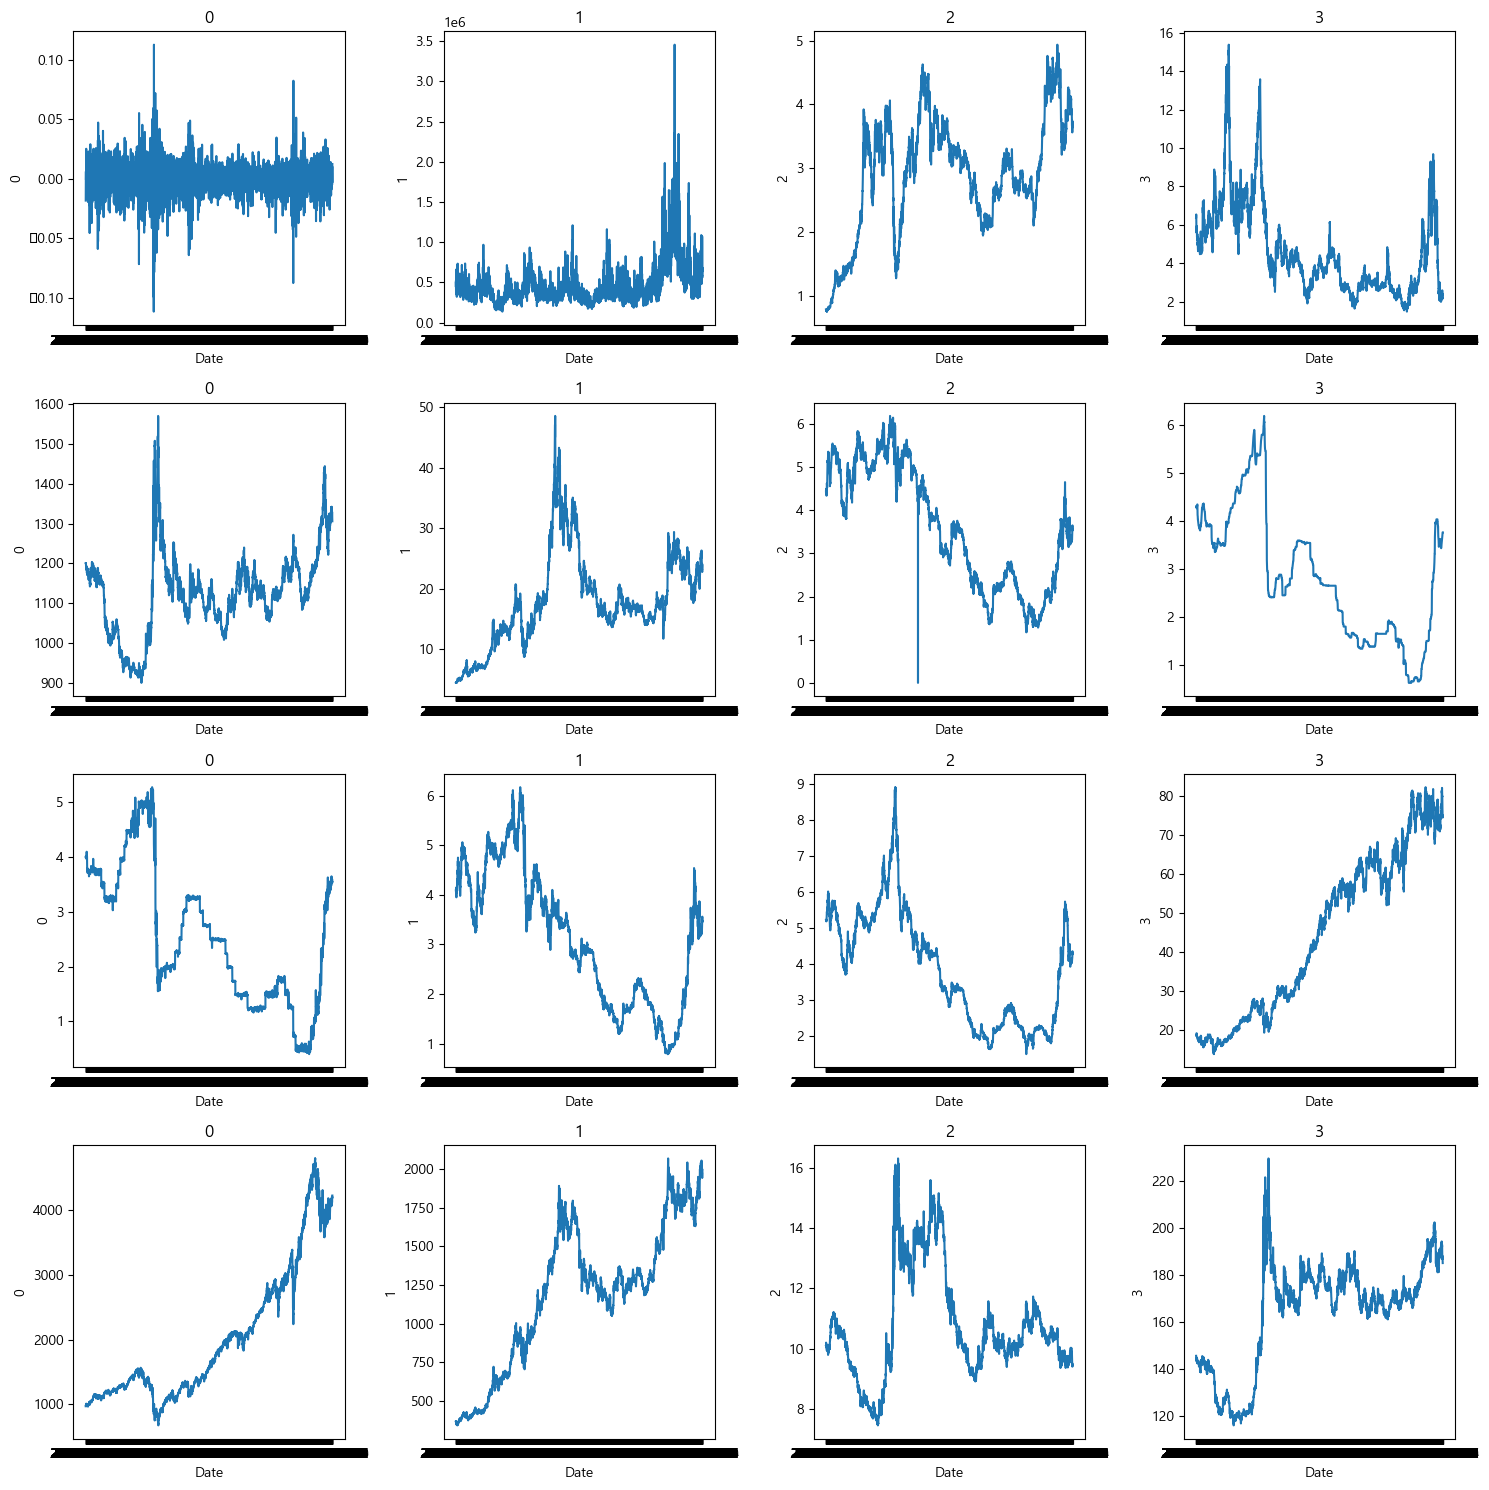

In [7]:
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# 각 컬럼에 대한 라인 그래프 그리기
for i, col in enumerate(df.columns):
    row = i // 4  # 현재 서브플롯의 행 인덱스
    col = i % 4   # 현재 서브플롯의 열 인덱스

    ax = axes[row, col]  # 현재 서브플롯 선택
    ax.plot(df.iloc[:,i])  # 라인 그래프 그리기
    ax.set_xlabel('Date')  # x축 레이블 설정
    ax.set_ylabel(col)  # y축 레이블 설정
    ax.set_title(col)  # 서브플롯 제목 설정

# 그래프 출력
plt.tight_layout()
plt.show()



## 시계열 성분 분해

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
df.columns

Index(['Adj Close', 'Volume', '구리', '천연가스', '원/달러', '은', '10년 채권', 'CD91일',
       '콜 금리', '국고채 3년', '회사채 3년', 'WTI유', 'SP500지수', '금', '원/엔', '원/위안'],
      dtype='object')

In [12]:
result=seasonal_decompose(
    df['원/위안'] , 
    model = 'additive',
    period=365 )

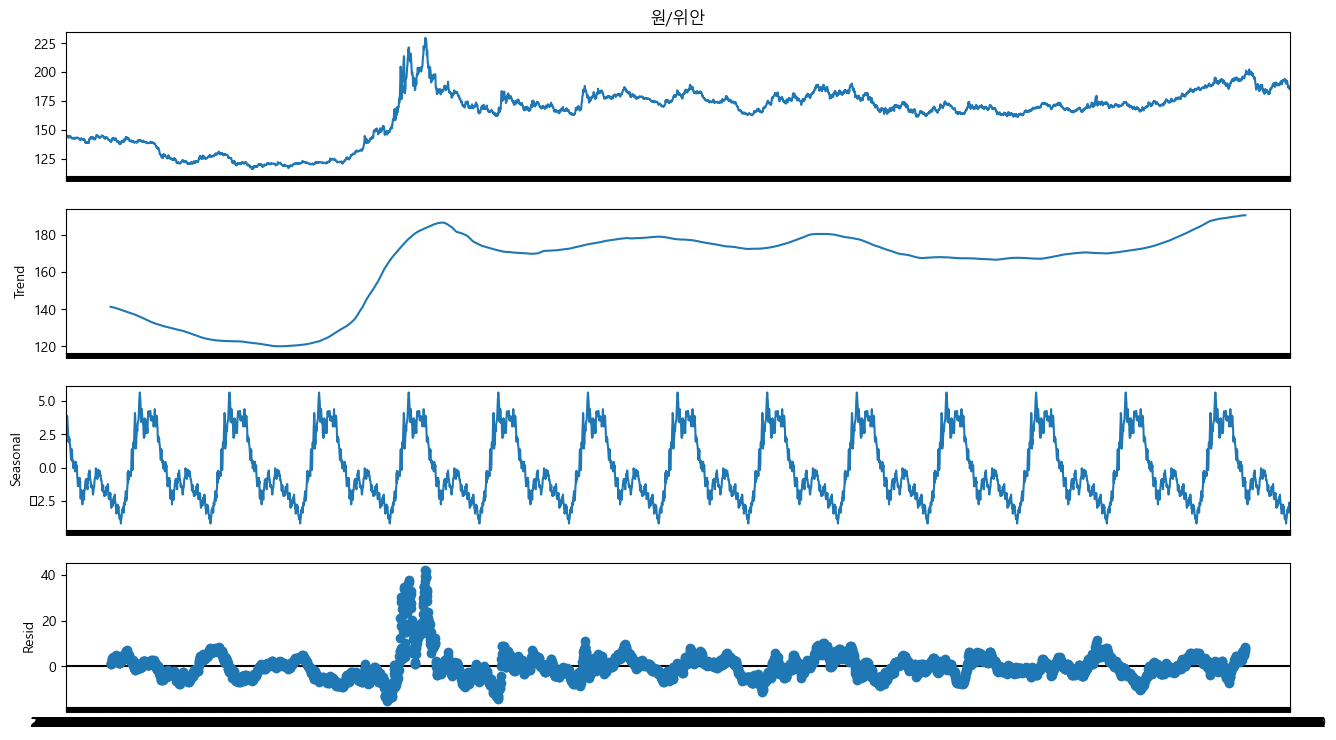

In [13]:
plt.rc("font", family="Malgun Gothic")


fig = result.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [24]:
365/4

91.25